# 1.Import neccessary libraries

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# 2.ETL data from Kaggle

In [22]:
df = pd.read_csv('/content/drive/MyDrive/Final Project Da/healthcare-dataset-stroke-data.csv')

## 2.1. Check information data and describe

In [23]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [24]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In the original stroke dataset, there are 5,110 records with a total of 12 columns, consisting of three data types: float64, int64, and object.

To streamline the dataset, I will remove the columns id, work_type, and ever_married, as these variables are not significant and do not contribute to predicting the likelihood of stroke.

# 2.2.Check how many this data have null value

In [25]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


According to the summary results, the bmi column contains only 4,909 values, which indicates the presence of missing values that need to be handled and replaced

# 2.3. ETL values

In [26]:
bmi_mean = df['bmi'].mean()
df['bmi'].fillna(bmi_mean, inplace=True)
df.isnull().sum()
df.drop_duplicates(inplace=True)
drop_columns = ['work_type','ever_married']
df.drop(columns=['id']+ drop_columns, inplace=True)
df = df[df['smoking_status'] != 'Unknown']
df.drop(df[df['smoking_status'] == 'Unknown'].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3566 entries, 0 to 5108
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3566 non-null   object 
 1   age                3566 non-null   float64
 2   hypertension       3566 non-null   int64  
 3   heart_disease      3566 non-null   int64  
 4   Residence_type     3566 non-null   object 
 5   avg_glucose_level  3566 non-null   float64
 6   bmi                3566 non-null   float64
 7   smoking_status     3566 non-null   object 
 8   stroke             3566 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 278.6+ KB


/tmp/ipython-input-3660322234.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(bmi_mean, inplace=True)


In numerous machine learning algorithms, the presence of missing values (NaN) is not permissible, as it may result in model errors or failure to execute.

A common and straightforward strategy to address this issue is mean imputation, whereby missing values are replaced with the average of the observed values. This approach maintains the integrity of the dataset by avoiding row deletion and preserving sample size.
Mean imputation is particularly appropriate when the variable distribution is approximately balanced and not substantially influenced by outliers.

In smoking status, it have the Unknown values - this value is represent for people does not know smoke or not. It is the same with the null value so I decided to eliminate them to make the database more accuracy to predict the stroke patients

Interquartile Range

I execute the IQR because in data preprocessing for machine learning, IQR-based filtering is essential for improving model reliability, as extreme values can distort parameter estimation and reduce predictive accuracy

# 2.4. IQR for Bmi

In [27]:
Q1_bmi = df['bmi'].quantile(0.25)
Q3_bmi = df['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi
lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi
print(lower_bound_bmi)
print(upper_bound_bmi)

12.8
46.39999999999999


IQR for Avg_glucose_level

In [28]:
Q1_glucose = df['avg_glucose_level'].quantile(0.25)
Q3_glucose = df['avg_glucose_level'].quantile(0.75)
IQR_glucose = Q3_glucose - Q1_glucose
lower_bound_glucose = Q1_glucose - 1.5 * IQR_glucose
upper_bound_glucose = Q3_glucose + 1.5 * IQR_glucose
print(lower_bound_glucose)
print(upper_bound_glucose)

18.63374999999997
175.50375000000003


The Interquartile Range (IQR) was calculated for two columns, bmi and avg_glucose_level, with the following lower and upper bounds:

BMI:

lower_bound_bmi: 10.15

upper_bound_bmi: 44.95

Avg_glucose_level:

lower_bound_glucose: 31.66

upper_bound_glucose: 147.44

However, the values in the dataset that fall outside these IQR thresholds were found to be actual observations without any signs of abnormality. Therefore, these values were retained to ensure the accuracy and integrity of the dataset.

# 3.EDA database



In [29]:
df['smoke_group'] = df['smoking_status'].map(
    lambda x: 'smoking' if x in ['smokes', 'formerly smoked']
    else 'non_smoke')

# 3.1.Convert categorical data to numeric

In [30]:
df_encoded = pd.get_dummies(df, columns=['gender','smoke_group','Residence_type'])
print(df_encoded)

       age  hypertension  heart_disease  avg_glucose_level        bmi  \
0     67.0             0              1             228.69  36.600000   
1     61.0             0              0             202.21  28.893237   
2     80.0             0              1             105.92  32.500000   
3     49.0             0              0             171.23  34.400000   
4     79.0             1              0             174.12  24.000000   
...    ...           ...            ...                ...        ...   
5102  57.0             0              0              77.93  21.700000   
5105  80.0             1              0              83.75  28.893237   
5106  81.0             0              0             125.20  40.000000   
5107  35.0             0              0              82.99  30.600000   
5108  51.0             0              0             166.29  25.600000   

       smoking_status  stroke  gender_Female  gender_Male  gender_Other  \
0     formerly smoked       1          False    

In [31]:
drop_columns = ['gender_Female','gender_Other','smoking_status']
df_encoded.drop(columns=drop_columns, inplace=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3566 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    3566 non-null   float64
 1   hypertension           3566 non-null   int64  
 2   heart_disease          3566 non-null   int64  
 3   avg_glucose_level      3566 non-null   float64
 4   bmi                    3566 non-null   float64
 5   stroke                 3566 non-null   int64  
 6   gender_Male            3566 non-null   bool   
 7   smoke_group_non_smoke  3566 non-null   bool   
 8   smoke_group_smoking    3566 non-null   bool   
 9   Residence_type_Rural   3566 non-null   bool   
 10  Residence_type_Urban   3566 non-null   bool   
dtypes: bool(5), float64(3), int64(3)
memory usage: 212.4 KB


# 3.2. Change suitable type for data

In [32]:
exclude_cols= ['hypertension','heart_disease','age','bmi','avg_glucose_level']
df_encoded = df_encoded.apply(lambda x: x.astype(int) if x.name not in exclude_cols else x)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3566 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    3566 non-null   float64
 1   hypertension           3566 non-null   int64  
 2   heart_disease          3566 non-null   int64  
 3   avg_glucose_level      3566 non-null   float64
 4   bmi                    3566 non-null   float64
 5   stroke                 3566 non-null   int64  
 6   gender_Male            3566 non-null   int64  
 7   smoke_group_non_smoke  3566 non-null   int64  
 8   smoke_group_smoking    3566 non-null   int64  
 9   Residence_type_Rural   3566 non-null   int64  
 10  Residence_type_Urban   3566 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 334.3 KB


In [33]:
print(df_encoded)

       age  hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0     67.0             0              1             228.69  36.600000       1   
1     61.0             0              0             202.21  28.893237       1   
2     80.0             0              1             105.92  32.500000       1   
3     49.0             0              0             171.23  34.400000       1   
4     79.0             1              0             174.12  24.000000       1   
...    ...           ...            ...                ...        ...     ...   
5102  57.0             0              0              77.93  21.700000       0   
5105  80.0             1              0              83.75  28.893237       0   
5106  81.0             0              0             125.20  40.000000       0   
5107  35.0             0              0              82.99  30.600000       0   
5108  51.0             0              0             166.29  25.600000       0   

      gender_Male  smoke_gr

# 4. General Analysis data


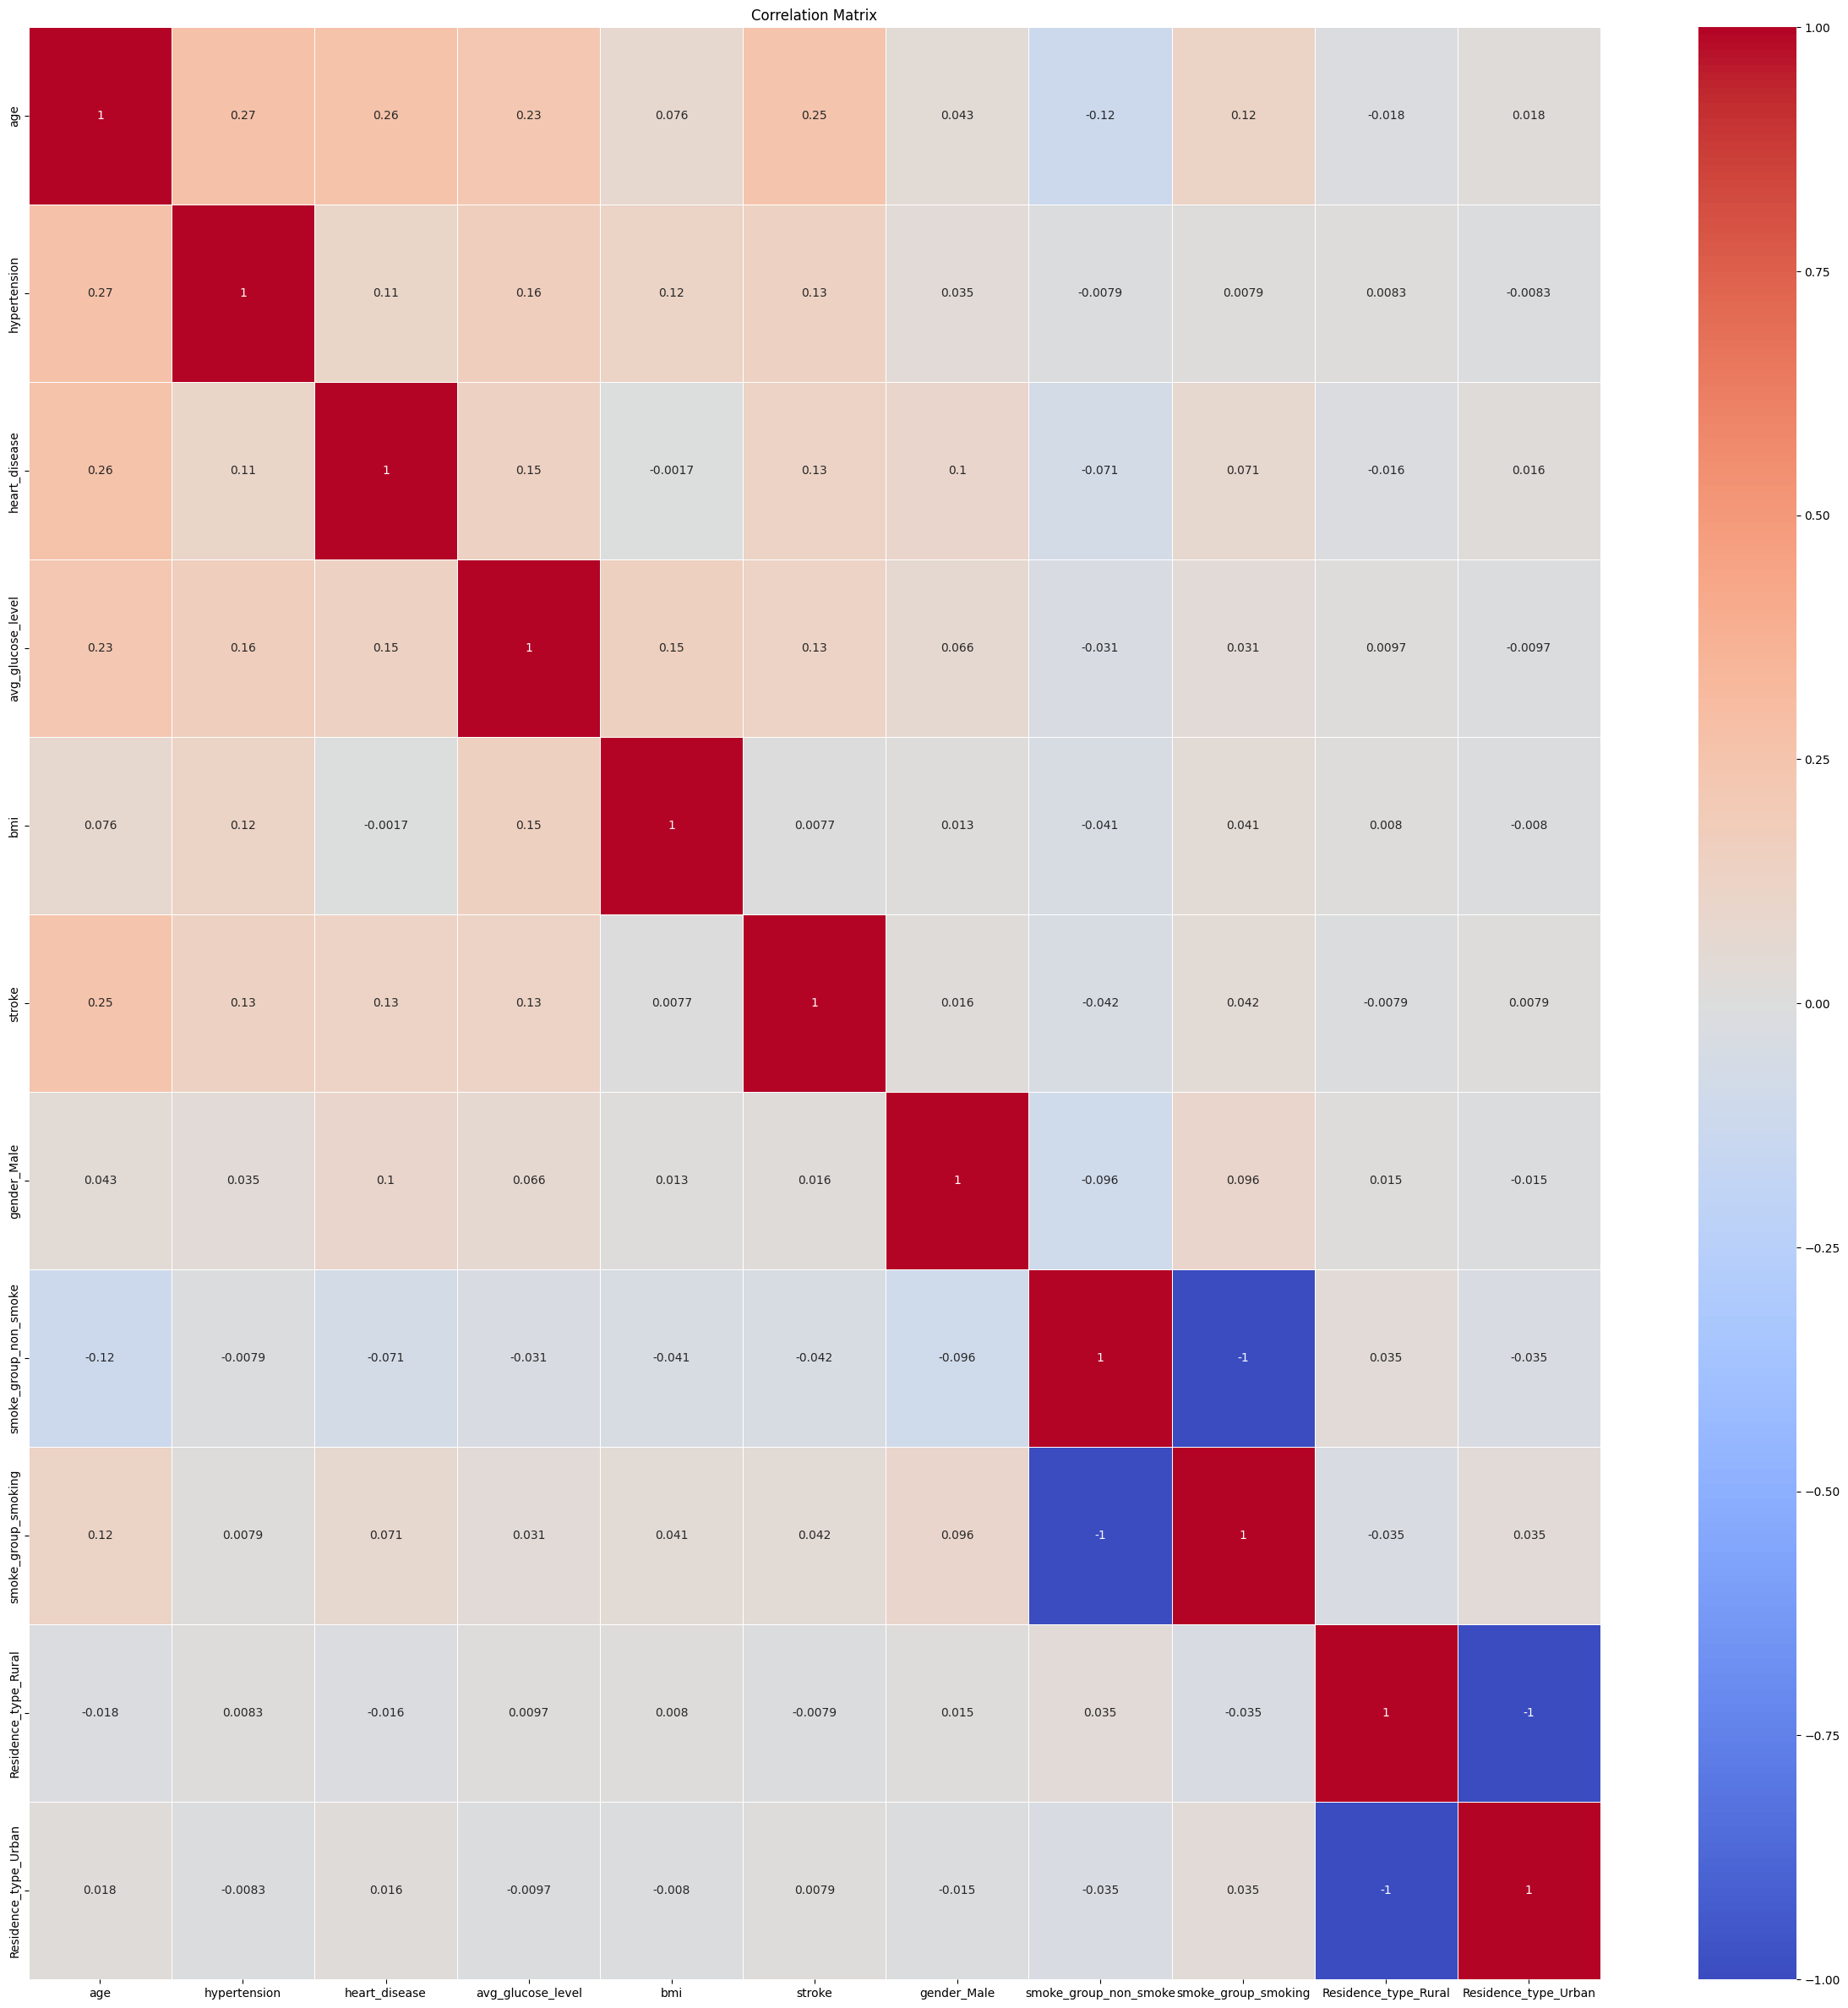

In [34]:
correlation_matrix = df_encoded.corr()
correlation_matrix
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Heatmap represent the relationship of each values in the datamodels. We can see Stroke have protpotional to age, hypertension, heart_disease,bmi, avg_glucose_level. That means this type affect and can lead to stroke easily. Moreover, male patients have more bmi, avg_glucose_level, heart disease and hypertension will have more chance to be stroke

# 4.1. Built Regression model

In [35]:
y_cols = ['stroke']
x = df_encoded.drop(columns=y_cols)
y = df_encoded['stroke']
x = sm.add_constant(x)
model= sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     36.63
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           3.06e-56
Time:                        12:35:11   Log-Likelihood:                 304.05
No. Observations:                3566   AIC:                            -590.1
Df Residuals:                    3557   BIC:                            -534.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.04

In linear regression analysis, variables with a p-value greater than 0.05 are typically excluded, as they are not considered statistically significant predictors. So I need to eliminate them

In [36]:
y_cols = ['stroke', 'gender_Male','bmi']
x = df_encoded.drop(columns=y_cols)
y = df_encoded['stroke']
x = sm.add_constant(x)
model= sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     48.38
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           2.32e-57
Time:                        12:35:12   Log-Likelihood:                 302.71
No. Observations:                3566   AIC:                            -591.4
Df Residuals:                    3559   BIC:                            -548.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

The formular to calculate stroke:

Stroke = -0.0529 + 0.0025*age + 0.0445*hypertension + 0.0559*heart_disease +0.0003*avg_glucose_level - 0.0290*non_smoke - 0.0239*smoking - 0.0272*Rural - 0.0255*Urban


In [37]:
df_encoded.to_csv("final_project_output_final.csv", index=False, encoding="utf-8")
df.to_csv('stroke_predict_final.csv', index= False, encoding="utf-8")

# 4.2.Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

x = df_encoded.drop(columns=['stroke'])
y = df_encoded['stroke']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
mode = model.predict(x_test)
accuracy = accuracy_score(y_test, mode)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, mode))

Accuracy: 0.927170868347339
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       665
           1       0.00      0.00      0.00        49

    accuracy                           0.93       714
   macro avg       0.47      0.50      0.48       714
weighted avg       0.87      0.93      0.90       714



Predict patents have stroke or not?

In [44]:
my_data = pd.DataFrame([{
    'const': 1,  # add constant column if model was trained with sm.add_constant()
    'age': 25,
    'hypertension': 0,
    'heart_disease': 0,
    'avg_glucose_level': 140,
    'bmi': 20.7,
    'gender_Male': 1,
    'smoke_group_non_smoke': 1,
    'smoke_group_smoking': 0,
    'Residence_type_Rural': 0,
    'Residence_type_Urban': 1
    }])

# Forecast
my_forecast = model.predict(my_data)[0]
print("Forecasted charges for me:", my_forecast)


Forecasted charges for me: 0
